https://www.kaggle.com/budincsevity/szeged-weather/

### Run this first

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Importing Dataset

Changing format to datetime

In [3]:
weather = pd.read_csv('weatherHistory.csv')
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'],utc=False)

### Preprocessing

In [4]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
type(weather['Formatted Date'][0])

datetime.datetime

In [6]:
type(weather['Summary'][0])

str

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Data Cleaning

In [9]:
weather.shape

(96453, 12)

In [10]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [11]:
weather[weather.isnull()['Precip Type']].head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00+02:00,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00+02:00,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00+02:00,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00+02:00,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00+02:00,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.


In [12]:
weather['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

Dropping Null values

In [13]:
weather.dropna(inplace=True)

In [14]:
weather['Loud Cover'].unique()

array([0.])

Dropping column `Loud Cover` as it has only value 0

In [15]:
weather.drop('Loud Cover',axis=1,inplace=True)

### Visualisation

We can see from below that `Apparent Temperature (C)` is dividing by 2 groups by the colum `Precip Type`

<AxesSubplot:xlabel='Precip Type', ylabel='Apparent Temperature (C)'>

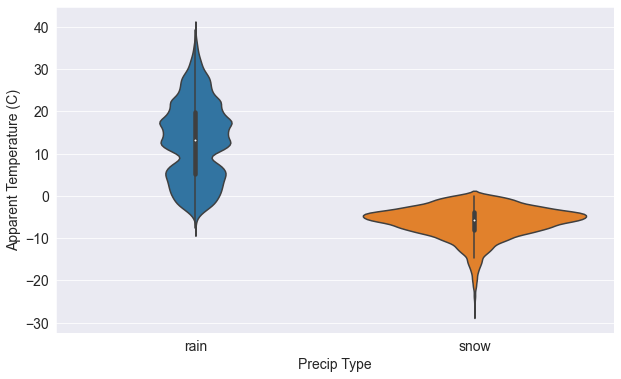

In [16]:
sns.violinplot(data=weather, x='Precip Type', y='Apparent Temperature (C)')

<AxesSubplot:xlabel='Precip Type', ylabel='Apparent Temperature (C)'>

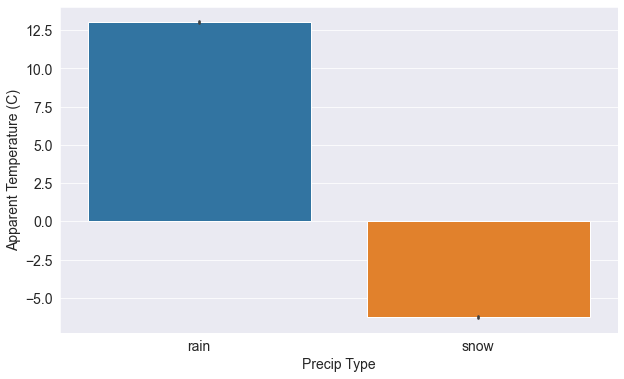

In [17]:
sns.barplot(data=weather, x='Precip Type', y='Apparent Temperature (C)')

In [18]:
weather.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000


<AxesSubplot:>

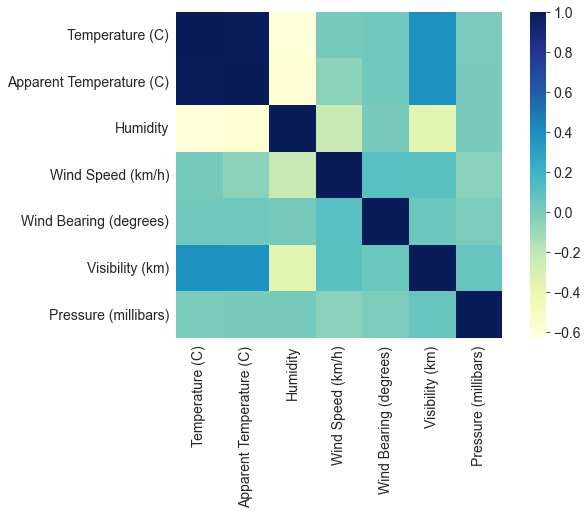

In [19]:
sns.heatmap(weather.corr(),square=True,cmap='YlGnBu')

We can see that there is a linear relationship between `Temperature (C)` and `Apparent Temperature (C)`

<AxesSubplot:xlabel='Temperature (C)', ylabel='Apparent Temperature (C)'>

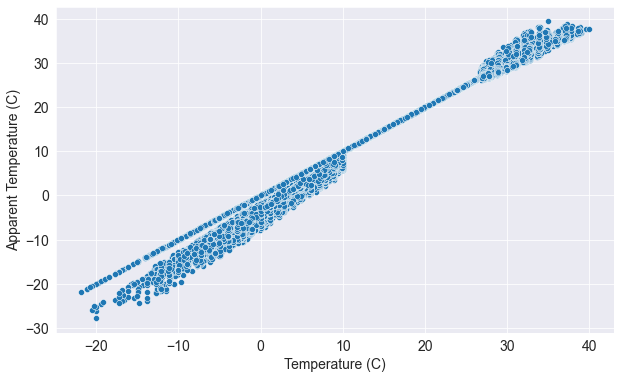

In [20]:
sns.scatterplot(data=weather, x='Temperature (C)', y='Apparent Temperature (C)')

<AxesSubplot:xlabel='Visibility (km)', ylabel='Apparent Temperature (C)'>

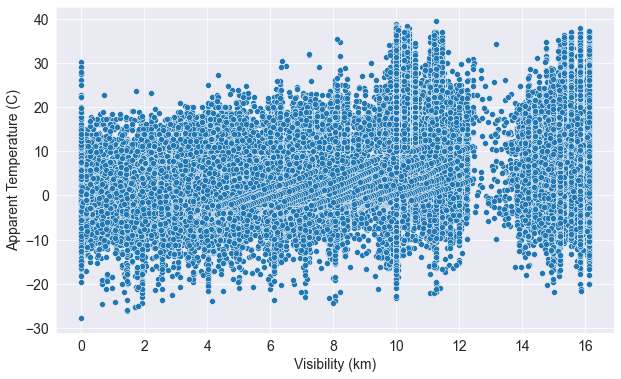

In [21]:
sns.scatterplot(data=weather, x='Visibility (km)', y='Apparent Temperature (C)')

<AxesSubplot:xlabel='Humidity', ylabel='Apparent Temperature (C)'>

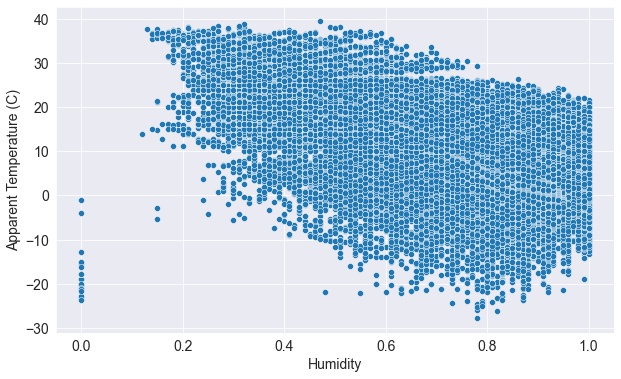

In [22]:
sns.scatterplot(data=weather, x='Humidity', y='Apparent Temperature (C)')

In [23]:
weather.corr()['Apparent Temperature (C)'].sort_values(ascending=False)

Apparent Temperature (C)    1.000000
Temperature (C)             0.992637
Visibility (km)             0.382589
Wind Bearing (degrees)      0.028951
Pressure (millibars)       -0.000037
Wind Speed (km/h)          -0.057387
Humidity                   -0.602390
Name: Apparent Temperature (C), dtype: float64

### Outliers

<AxesSubplot:xlabel='Humidity'>

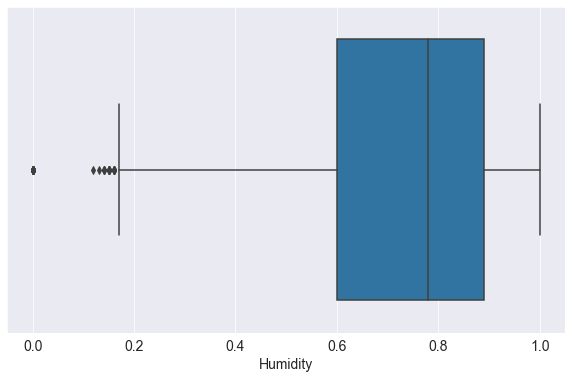

In [24]:
sns.boxplot(data=weather, x='Humidity')

In [25]:
weather = weather[(weather['Humidity']>= 0.2) & (weather['Humidity']<=1)]

<AxesSubplot:xlabel='Temperature (C)'>

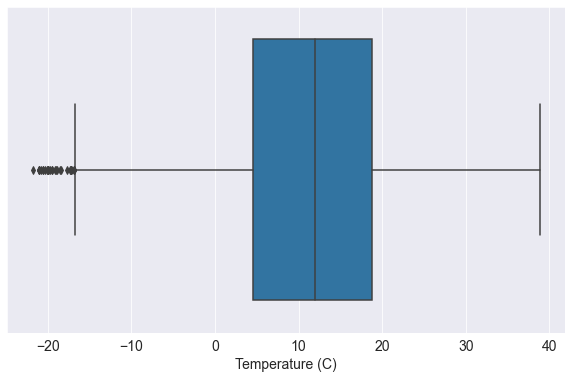

In [26]:
sns.boxplot(data=weather, x='Temperature (C)')

In [27]:
weather = weather[(weather['Temperature (C)']>= -20) & (weather['Temperature (C)']<=40)]

In [28]:
X = weather[['Temperature (C)','Humidity']]
Y = weather[['Apparent Temperature (C)']]

### Feature Scaling

In [29]:
cols = ['Temperature (C)','Humidity']

In [30]:
scaler = StandardScaler().fit(X)
scaled_data = scaler.transform(X)
X = scaled_data

### Modelling 

#### Mutiple Linear Regression

In [31]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
print('RMSE is :',rmse(y_test,y_pred))
print('Coefficient of determination :',model.score(x_test,y_test))

RMSE is : Apparent Temperature (C)    1.258524
dtype: float64
Coefficient of determination : 0.9862240577143538


#### Polynomial Regression

In [37]:
poly = PolynomialFeatures(degree=5).fit(X)
X1 = poly.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1,Y, test_size=0.25, random_state=42)
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
print('RMSE is :',rmse(y_test,y_pred))
print('Coefficient of determination :',model.score(x_test,y_pred))

RMSE is : Apparent Temperature (C)    1.097845
dtype: float64
Coefficient of determination : 1.0


Polyynomial Regression gave a less loss error